## Desafio

1. Vá no [goodreadbooks](https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks) e baixe o CSV. Carregue o arquivo e crie um dataset dos livros.

2. Vá no [Open Library API](https://openlibrary.org/dev/docs/api/books) e se conecte com um colab notebook, criando um DataFrame com apenas os livros do Harry Potter. Seja criativo.


In [1]:
# Importando Bibliotecas
import matplotlib as plt
%matplotlib inline
import numpy as np
import pandas as pd
import requests

%load_ext autoreload
%autoreload 2


In [14]:
# Carregando arquivo
book = pd.read_excel(r"C:\Users\pedro\Documents\GitHub\Portifolio\Scripts_atividades_treino\books.xlsx")

book

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780440000000,eng,652,2095690.0,27591.0,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780440000000,eng,870,2153167.0,29221.0,37995,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780440000000,eng,352,6333.0,244.0,37632,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780440000000,eng,435,2339585.0,36325.0,37991,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780440000000,eng,2690,41428.0,164.0,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560000000,eng,512,156.0,20.0,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9780140000000,eng,635,783.0,56.0,32154,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9780140000000,eng,415,820.0,95.0,33977,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9780060000000,eng,434,769.0,139.0,2/27/2007,Ecco


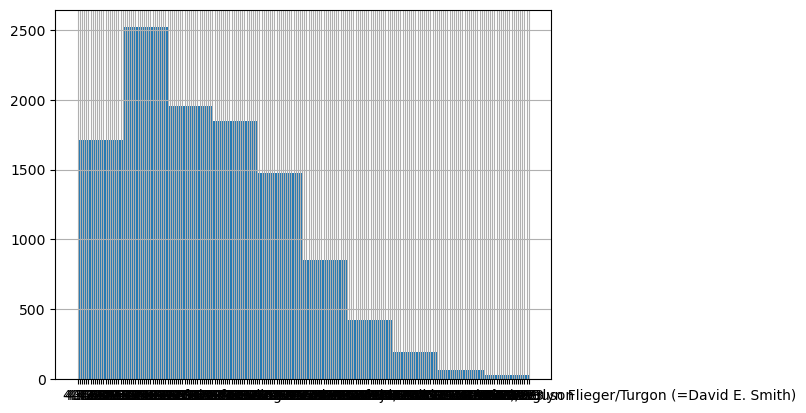

In [15]:
# Histograma
book["average_rating"].hist(bins = 10);

In [17]:
# Buscar Informações do livro Harry Potter em formato JSON dentro da biblioteca opem library
base_url = "https://openlibrary.org"
formato_busca = "/search.json"
query_params = {
    "q": "Harry Potter",
    "type": "work"
}
url = base_url + formato_busca


In [18]:
# Integração da API
response = requests.get(url, params=query_params)
data = response.json()


In [20]:
# Criando e oganizando o DataFrame
books = []
for work in data["docs"]:
    title = work.get("title", "Unknown Title")
    author = work.get("author_name", ["Unknown Author"])
    published_year = work.get("first_publish_year", "Unknown Year")
    isbn = work.get("isbn","Unknown ISBN")

    books.append({
        "Title": title,
        "Author": ", ".join(author),
        "Published Year": published_year,
        "isbn": isbn
    })

df = pd.DataFrame(books)

df

,Title,Author,Published Year,isbn
0,Harry Potter and the Deathly Hallows,J. K. Rowling,2007,"[1526618354, 9781408855713, 9788372782816, 978..."
1,Harry Potter and the Order of the Phoenix,J. K. Rowling,2003,"[0807220299, 9789844641723, 2070612406, 849838..."
2,Harry Potter and the Chamber of Secrets,J. K. Rowling,1998,"[9788478884957, 9780439064873, 9780747538493, ..."
3,Harry Potter and the Prisoner of Azkaban,J. K. Rowling,1999,"[9788478886555, 9781551922461, 9784915512407, ..."
4,Harry Potter and the Philosopher's Stone,J. K. Rowling,1997,"[0320038432, 9781408865279, 9780685113912, 818..."
...,...,...,...,...
95,Harry Potter,Insight Editions,2018,"[1682982874, 9781682983416, 9781682982891, 978..."
96,Harry Potter,J. K. Rowling,2001,"[9780747560005, 0747575444, 0747560005, 978074..."
97,Harry Potter,Vanessa Moody,2021,"[133876764X, 9781338767643, 0702319449, 978070..."
98,Harry Potter Recipes,Haylee Hall,2020,"[9798640814118, 9798640814170]"
